# About

Test for BERT implementations

In [1]:
# checks if GPU is available
import torch
torch.cuda.is_available()

True

# quick look at the various data

In [2]:
import os
import pandas as pd
import numpy as np

# path to the data
p_base_dir = "/mnt/disks/w210-jcgy-bucket/w210-data-output-new-q-and-a-files-with-separate-cleaned-answer-bodies"
p_questions_11k = os.path.join(p_base_dir, "new_qs_11k.csv")
p_questions_22k = os.path.join(p_base_dir, "new_qs_22k.csv")
p_answers = os.path.join(p_base_dir, "PostAnswersFiltered_V4_cleaned_answer_bodies.tsv")

# path to list of questions
p_check_questions = os.path.join(p_base_dir, "Sample Questions V 2.csv")

## check questions

the list of questions used for checking

In [3]:
check_questions = pd.read_csv(p_check_questions, sep = "\t", keep_default_na = False, encoding = "utf-8")

In [9]:
check_questions.head(3)

,question
0,Is there a way to visualize the distribution o...
1,How do I show data on a map?
2,How can I illustrate changes in my data over t...


## answers

the answers from stackoverflow

In [4]:
answers = pd.read_csv(p_answers, sep = "\t", keep_default_na = False, encoding = "utf-8")

In [11]:
answers.shape

(542216, 23)

In [12]:
answers.head(3)

,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,last_activity_date,...,owner_display_name,owner_user_id,parent_id,post_type_id,score,tags,view_count,images_list,code_snippets,cleaned_body
0,15956654,,<p>Go to Edit --> Preferences --> Python and s...,,,0,,2013-04-11 18:56:38.187000+00:00,,2013-04-11 18:56:38.187000+00:00,...,,1473765.0,15955808,2,0,,,[],[],Go to Edit --> Preferences --> Python and sel...
1,15957626,,"<p>Like @Baptiste said, just use facetting. An...",,,0,,2013-04-11 19:51:27.630000+00:00,,2013-04-11 19:51:27.630000+00:00,...,,1033808.0,15957399,2,0,,,"[<img alt=""enter image description here"" src=""...","[<code>ggplot(aes(x = mpg), data = mtcars) + \...","Like @Baptiste said, just use facetting. An e..."
2,15957907,,<p>Without spending a lot of time digging thro...,,,0,,2013-04-11 20:07:16.230000+00:00,,2013-04-11 20:07:16.230000+00:00,...,,669143.0,15954672,2,0,,,[],[<code>digraph G {\r\r\r\n nodesep = 0.5;\r...,Without spending a lot of time digging throug...


In [13]:
answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542216 entries, 0 to 542215
Data columns (total 23 columns):
id                          542216 non-null int64
title                       542216 non-null object
body                        542216 non-null object
accepted_answer_id          542216 non-null object
answer_count                542216 non-null object
comment_count               542216 non-null int64
community_owned_date        542216 non-null object
creation_date               542216 non-null object
favorite_count              542216 non-null object
last_activity_date          542216 non-null object
last_edit_date              542216 non-null object
last_editor_display_name    542216 non-null object
last_editor_user_id         542216 non-null object
owner_display_name          542216 non-null object
owner_user_id               542216 non-null object
parent_id                   542216 non-null int64
post_type_id                542216 non-null int64
score                     

## questions

the questions from stackoverflow

In [5]:
questions_11k = pd.read_csv(p_questions_11k, sep = ",", keep_default_na = False, encoding = "utf-8")

In [15]:
questions_11k.shape

(11000, 73)

In [16]:
questions_11k.head(3)

,Unnamed: 0,id,title,body,accepted_answer_id,answer_count,comment_count,community_owned_date,creation_date,favorite_count,...,plyr,pie-chart,graphviz,spss,diagram,qlikview,altair,r,parsedtags,new_tags
0,177443,19178315,Sonar -LOC & Cyclomatic complexity,<p>How does Sonar calculates software metrics ...,,2,0,,2013-10-04 09:52:38.377000+00:00,,...,0,0,0,0,0,0,0,0,line,line
1,81483,4642828,How to get multiple years Y-axis data from a s...,<p>I have gas meter readings over three years ...,,2,0,,2011-01-10 00:39:45.173000+00:00,8.0,...,0,0,0,0,0,0,0,0,php ggplot2 plot graph,php ggplot2 plot graph
2,81659,4706451,How to save a figure remotely with pylab?,<p>I'm trying to generate a figure at a remote...,4706614.0,2,1,,2011-01-16 16:11:59.350000+00:00,17.0,...,0,0,0,0,0,0,0,0,python matplotlib plot,python matplotlib plot


In [17]:
questions_11k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 73 columns):
Unnamed: 0                  11000 non-null int64
id                          11000 non-null int64
title                       11000 non-null object
body                        11000 non-null object
accepted_answer_id          11000 non-null object
answer_count                11000 non-null int64
comment_count               11000 non-null int64
community_owned_date        11000 non-null object
creation_date               11000 non-null object
favorite_count              11000 non-null object
last_activity_date          11000 non-null object
last_edit_date              11000 non-null object
last_editor_display_name    11000 non-null object
last_editor_user_id         11000 non-null object
owner_display_name          11000 non-null object
owner_user_id               11000 non-null object
parent_id                   11000 non-null object
post_type_id                11000 non-null in

## corpus, example

In [ ]:
t1 = questions_11k # ends 5628 q-a pairs
# t1 = questions_22k # ends up with 11235 q-a pairs
t1 = t1[t1["accepted_answer_id"]  != ""]
t1["accepted_answer_id"] = t1["accepted_answer_id"].astype(float).astype(int)
t1 = t1[[
    "id"
    , "title"
    , "tags"
    , "accepted_answer_id"
]].rename(columns = {
    "id" : "q_id"
    , "title" : "q_title"
})

In [23]:
t2 = answers[[
    "id"
    , "body"
    , "images_list"
    , "code_snippets"
    , "cleaned_body"
]].rename(columns = {
    "id" : "a_id"
    , "body" : "a_body"
    , "images_list" : "a_images_list"
    , "code_snippets" : "a_code_snippets"
    , "cleaned_body" : "a_cleaned_body"
})

In [25]:
t3 = t1.merge(
    t2
    , left_on = "accepted_answer_id"
    , right_on = "a_id"
    , how = "inner"
).drop(columns = "a_id")

In [26]:
t3.head(3)

,q_id,q_title,tags,accepted_answer_id,a_body,a_images_list,a_code_snippets,a_cleaned_body
0,4706451,How to save a figure remotely with pylab?,pythonmatplotlibfigure,4706614,"<p>By default, matplotlib will use something l...",[],"[<code>TkAgg</code>, <code>Agg</code>, <code>i...","By default, matplotlib will use something lik..."
1,41325227,How to do linear regression using Python and S...,pythonscikit-learnlinear-regression,41345907,<p>You can do like:</p>\r\r\r\n\r\r\r\n<pre><c...,[],[<code>from sklearn.preprocessing import OneHo...,You can do like: Please note that this exampl...
2,32595803,Read a blank column in a CSV file with Ruby,rubycsvblank-line,32595876,<p>If you've used <code>CSV.parse</code> for p...,[],"[<code>CSV.parse</code>, <code>nil</code>, <co...","If you've used for parsing (I hope you do), y..."


In [27]:
t3.shape

(5628, 8)

# loads our wrapper classes

we're not using NYTimes article feed

so instead of the News Title vs News Body, we have Question Title vs Question Body

and we're going to make it similar to Grace's framework, so it will be easier for Chi to adapt

In [7]:
import sys
sys.path.append("..")
from src.models import bert_model_5d as bert_model

In [8]:
import inspect
print(inspect.getsource(bert_model))

import gcsfs
import os
import logging
import random
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import json
import gc
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader, SequentialSampler
from pytorch_pretrained_bert.modeling import BertForNextSentencePrediction
from pytorch_pretrained_bert.tokenization import BertTokenizer
from fastprogress import master_bar, progress_bar
from sklearn.model_selection import StratifiedShuffleSplit

class Suggester_BertTopicSimiliarty():
    def __init__(
        self
        , question_file
        , answer_file
        , sample_n
        , random_state
        , bert_cache
        , logger
        , device
        , max_seq_length
        , batch_size
    ):
        # initializes some vars
        self.question_file = question_file
        self.answer_file = answer_file
        self.sample_n = sample_n
        self.random_state = random_state
        self.bert_cache = bert_cache
      

In [9]:
# i.e. app.py

import gcsfs
import os
import logging
import random
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import json
import gc
import matplotlib.pyplot as plt

from torch.utils.data import TensorDataset, DataLoader, SequentialSampler
from pytorch_pretrained_bert.modeling import BertForNextSentencePrediction
from pytorch_pretrained_bert.tokenization import BertTokenizer
from fastprogress import master_bar, progress_bar
from sklearn.model_selection import StratifiedShuffleSplit


# defines seed for replication
SEED = 20191202

# defines cache folder for BERT model
PYTORCH_PRETRAINED_BERT_CACHE = "../models/bert/"

# defines other hyper parameters
# SAMPLE_SIZE = 10
SAMPLE_SIZE = None
BATCH_SIZE = 128
MAX_SEQ_LENGTH = 200

# creates a logger
logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s -   %(message)s',
                    datefmt = '%m/%d/%Y %H:%M:%S',
                    level = logging.INFO)
logger = logging.getLogger("bert")


# detects the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# sets random states
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if device == torch.device("cuda"):
    torch.cuda.manual_seed_all(SEED)

# check answers for single question

In [ ]:
# ... gets a set of questions
p_questions = p_questions_22k

# ... creates an instance of our wrapper
m = bert_model.Suggester_BertTopicSimiliarty(
    p_questions
    , p_answers
    , sample_n = None
    , random_state = SEED
    , bert_cache = PYTORCH_PRETRAINED_BERT_CACHE
    , logger = logger
    , device = device
    , max_seq_length = MAX_SEQ_LENGTH
    , batch_size = BATCH_SIZE
)

# ... loads data and builds a corpus
m.prepare()

# ... gets top 5 similar results
similar_que, similar_ans, similar_img, similar_code = m.get_similar_documents(query = "Is there a way to visualize the distribution of my data?", num_results = 5)

t1 = m.best_matches.copy()

In [19]:
t1.head(3)

,q_id,q_title,tags,accepted_answer_id,a_body,a_images_list,a_code_snippets,a_cleaned_body,similarity
10248,10944621,Dynamically updating plot in matplotlib,pythonmatplotlibtkinter,10944967,<blockquote>\r\r\r\n <p><em>Is there a way in...,[],"[<code>data</code>, <code>data</code>, <code>i...",Is there a way in which I can update the plot...,0.999996
1521,7688275,save yaxis legends as a separate grob?,rggplot2,15642634,"<p>This question has been sitting long enough,...","[<img alt=""demo graph"" src=""https://i.stack.im...",[<code>library(grid)\r\r\r\nlibrary(lubridate)...,"This question has been sitting long enough, t...",0.999996
10299,8112791,Multiple density graphs different groups (base...,rloopsgraphicsplyr,8113154,<p>I see that @Andrie just beat me to most of ...,"[<img alt=""enter image description here"" src=""...",[<code>set.seed(1234)\r\r\r\nAa = c(rnorm(4000...,I see that @Andrie just beat me to most of th...,0.999996


In [20]:
t1.shape

(5, 9)

In [21]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 10248 to 8739
Data columns (total 9 columns):
q_id                  5 non-null int64
q_title               5 non-null object
tags                  5 non-null object
accepted_answer_id    5 non-null int64
a_body                5 non-null object
a_images_list         5 non-null object
a_code_snippets       5 non-null object
a_cleaned_body        5 non-null object
similarity            5 non-null float32
dtypes: float32(1), int64(2), object(6)
memory usage: 380.0+ bytes


In [22]:
similar_que

10248              Dynamically updating plot in matplotlib
1521                save yaxis legends as a separate grob?
10299    Multiple density graphs different groups (base...
1791                Generate dynamic graph from MySQL data
8739                          skip legend in for loop plot
Name: q_title, dtype: object

In [23]:
similar_ans

10248     Is there a way in which I can update the plot...
1521      This question has been sitting long enough, t...
10299     I see that @Andrie just beat me to most of th...
1791      Great question one awesome solution that i ha...
8739      Please try this, I don't have data to plot bu...
Name: a_cleaned_body, dtype: object

In [24]:
similar_img

10248                                                   []
1521     [<img alt="demo graph" src="https://i.stack.im...
10299    [<img alt="enter image description here" src="...
1791                                                    []
8739     [<img alt="enter image description here" src="...
Name: a_images_list, dtype: object

In [25]:
similar_code

10248    [<code>data</code>, <code>data</code>, <code>i...
1521     [<code>library(grid)\r\r\r\nlibrary(lubridate)...
10299    [<code>set.seed(1234)\r\r\r\nAa = c(rnorm(4000...
1791                                                    []
8739     [<code>figure(4);\r\r\r\nfor i=1:300  \r\r\r\n...
Name: a_code_snippets, dtype: object

# checking performance on various sizes of data

In [14]:
def g1(p_questions, p_answers, p_check_questions, sample_n):
    # creates an instance of our wrapper
    m = bert_model.Suggester_BertTopicSimiliarty(
        p_questions
        , p_answers
        , sample_n = sample_n
        , random_state = SEED
        , bert_cache = PYTORCH_PRETRAINED_BERT_CACHE
        , logger = logger
        , device = device
        , max_seq_length = MAX_SEQ_LENGTH
        , batch_size = BATCH_SIZE
    )

    # loads data and builds a corpus
    m.prepare()
    
    # gets the list of check questions
    check_questions = pd.read_csv(p_check_questions, sep = "\t", keep_default_na = False, encoding = "utf-8")
    
    # evaluates model against all check-questions
    res = []
    res_df = pd.DataFrame()
    for q in check_questions.question:
        similar_que, similar_ans, similar_img, similar_code = m.get_similar_documents(query = q, num_results = 5)
        t1 = m.best_matches.copy()
        t1["user_input"] = q
        t1["q_file"] = os.path.basename(p_questions)
        t2 = t1[[
            "q_file"
            , "user_input"
            , "similarity"
            , "q_id"
            , "q_title"
            , "tags"
            , "accepted_answer_id"
            , "a_body"
            , "a_cleaned_body"
            , "a_images_list"
            , "a_code_snippets"
        ]]
        res.append(t2)
    res_df = pd.concat(res)
    res_df.sort_values(["q_file", "user_input", "similarity"], ascending=[True, True, False])
    return(res_df)

## for 11k

In [ ]:
t1 = g1(p_questions_11k, p_answers, p_check_questions, sample_n = None)

Looks like it takes 35 seconds for each question, for 5628 question-answer pairs (based on the 11k sample)

For 18 questions, takes about 10 minutes total

## for 22K

In [ ]:
t2 = g1(p_questions_22k, p_answers, p_check_questions, sample_n = None)

Looks like it takes 1 minute 11 seconds for each question, for 11235 question-answer pairs (based on the 22k sample)

For 18 questions, takes about 21 minutes total

## speed, scaling to number of samples

In [36]:
def g2(p_questions, p_answers, p_check_questions, sample_n):
    # creates an instance of our wrapper
    m = bert_model.Suggester_BertTopicSimiliarty(
        p_questions
        , p_answers
        , sample_n = sample_n
        , random_state = SEED
        , bert_cache = PYTORCH_PRETRAINED_BERT_CACHE
        , logger = logger
        , device = device
        , max_seq_length = MAX_SEQ_LENGTH
        , batch_size = BATCH_SIZE
    )

    # loads data and builds a corpus
    m.prepare()
    
    # gets the list of check questions
    check_questions = pd.read_csv(p_check_questions, sep = "\t", keep_default_na = False, encoding = "utf-8")
    q = check_questions.question[0]
    
    # evaluates model against a single check-questions, times the result
    import time
    t0 = time.time()
    similar_que, similar_ans, similar_img, similar_code = m.get_similar_documents(query = q, num_results = 5)
    _ = m.best_matches.copy()
    t1 = time.time()
    total = t1-t0
    return(total)

In [37]:
sample_n_list = [8, 516, 1024, 2048, 4096, 8192, 11000]
sample_n_list

[8, 516, 1024, 2048, 4096, 8192, 11000]

In [ ]:
run_times = []
for sample_n in sample_n_list:
    t3 = g2(p_questions_22k, p_answers, p_check_questions, sample_n = sample_n)
    run_times.append(t3)

In [39]:
print(sample_n_list)
print(run_times)

[8, 516, 1024, 2048, 4096, 8192, 11000]
[0.11218023300170898, 3.9586384296417236, 7.878463983535767, 15.48396897315979, 31.033019065856934, 61.93504333496094, 83.281094789505]


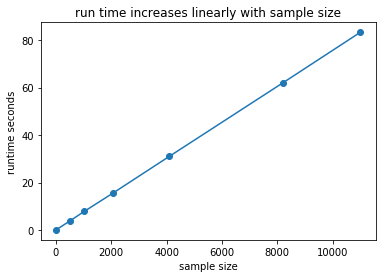

In [40]:
import matplotlib.pyplot as plt
plt.plot(sample_n_list, run_times, marker = "o")
plt.title("run time increases linearly with sample size")
plt.xlabel("sample size")
plt.ylabel("runtime seconds")
plt.show()